# Import Packages

In [119]:
# suport
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# evaluasi
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [120]:
import warnings
warnings.filterwarnings('ignore')

# Persiapan

In [121]:
# membaca dataset
dataset = pd.read_excel('dataset2.xlsx',converters={'Medical result（0 No；1 mild；2 severe）':int})

# mengisi kolom yg kosong dengan 0
col_set = dataset.columns
for column in col_set :
    dataset[column].fillna(0, inplace = True)

# memisahkan kelas yang akan diklasifikasikan dengan fitur
X = dataset.iloc[:,:-1]
y = dataset['Medical result（0 No；1 mild；2 severe）']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Hasil Bawaan

## Inisialisasi Model

In [122]:
# Decision Tree Classifier
model_tree = OneVsRestClassifier(tree.DecisionTreeClassifier())

# Logistics Regression Classifier
model_logistic = OneVsRestClassifier(LogisticRegression(penalty='l2'))

# Gradient Boosting Decision Tree Classifier
model_GBDT = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=300))

# Support Vector CLassifier
model_SVC = OneVsRestClassifier(LinearSVC(random_state = 0))

## Fitting dan Predict Model

In [123]:
# Decision Tree Classifier
model_tree.fit(X_train,Y_train)
y_predict_tree = model_tree.predict(X_test)

# Logistics Regression Classifier
model_logistic.fit(X_train,Y_train)
y_predict_logistic = model_logistic.predict(X_test)

# Gradient Boosting Decision Tree Classifier
model_GBDT.fit(X_train,Y_train)
y_predict_GBDT = model_GBDT.predict(X_test)

# Support Vector CLassifier
model_SVC.fit(X_train,Y_train)
y_predict_SVC = model_SVC.predict(X_test)

In [124]:
model_knn =OneVsRestClassifier(KNeighborsClassifier())
y_predict_knn = model_knn.fit(X_train,Y_train).predict(X_test)

np.mean(y_predict_knn==Y_test)

0.6105263157894737

## Evaluasi

### Precision Recall Fscore dan Support

In [125]:
# Gradient Boosting Decision Tree Classifier
precision_recall_fscore_support(Y_test, y_predict_GBDT, average=None)

(array([0.86363636, 0.94642857, 1.        ]),
 array([0.95      , 0.94642857, 0.89473684]),
 array([0.9047619 , 0.94642857, 0.94444444]),
 array([20, 56, 19], dtype=int64))

In [126]:
# Support Vector CLassifier
precision_recall_fscore_support(Y_test, y_predict_SVC, average=None)

(array([0.875     , 0.63855422, 0.5       ]),
 array([0.35      , 0.94642857, 0.10526316]),
 array([0.5       , 0.76258993, 0.17391304]),
 array([20, 56, 19], dtype=int64))

In [127]:
# Decision Tree Classifier
precision_recall_fscore_support(Y_test, y_predict_tree, average=None)

(array([0.88235294, 0.92592593, 0.70833333]),
 array([0.75      , 0.89285714, 0.89473684]),
 array([0.81081081, 0.90909091, 0.79069767]),
 array([20, 56, 19], dtype=int64))

In [128]:
# Logistics Regression Classifier
precision_recall_fscore_support(Y_test, y_predict_logistic, average=None)

(array([0.6875    , 0.70422535, 0.625     ]),
 array([0.55      , 0.89285714, 0.26315789]),
 array([0.61111111, 0.78740157, 0.37037037]),
 array([20, 56, 19], dtype=int64))

In [129]:
precision_recall_fscore_support(Y_test, y_predict_knn, average=None)

(array([0.55555556, 0.64864865, 0.41666667]),
 array([0.25      , 0.85714286, 0.26315789]),
 array([0.34482759, 0.73846154, 0.32258065]),
 array([20, 56, 19], dtype=int64))

### Akurasi

In [130]:
acc = {'Decision Tree': np.mean(y_predict_tree == Y_test),'Logistics': np.mean(y_predict_logistic == Y_test), 'GBDT': np.mean(y_predict_GBDT == Y_test), 'SVC': np.mean(y_predict_SVC == Y_test)}

In [131]:
# nilai akurasi rata2 tiap kelas
acc

{'Decision Tree': 0.8631578947368421,
 'Logistics': 0.6947368421052632,
 'GBDT': 0.9368421052631579,
 'SVC': 0.6526315789473685}

### K-fold Cross Validation

In [132]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_GBDT, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 82.11% (6.32%)


In [133]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_tree, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 80.00% (6.14%)


In [134]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_SVC, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 41.05% (12.63%)


In [135]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_logistic, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 58.95% (11.24%)


### Confusion Matrix

In [136]:
cm_tree = confusion_matrix(Y_test, y_predict_tree, labels=[0,1,2])
cm_logistic = confusion_matrix(Y_test, y_predict_logistic, labels=[0,1,2])
cm_GBDT = confusion_matrix(Y_test, y_predict_GBDT, labels=[0,1,2])
cm_SVC = confusion_matrix(Y_test, y_predict_SVC, labels=[0,1,2])

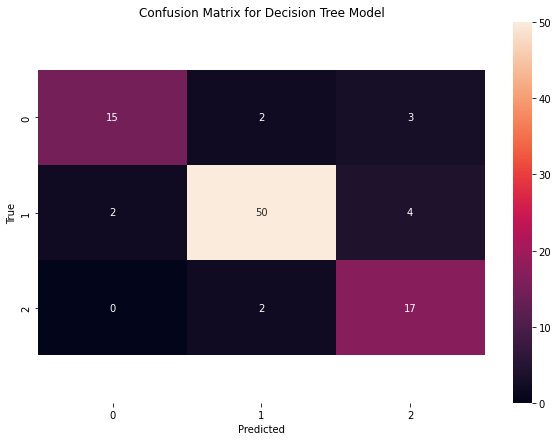

In [137]:
# Decision Tree
df_cm = pd.DataFrame(cm_tree, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Decision Tree Model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_tree_150', dpi = 150)
plt.savefig('confusion_matrix_tree_600', dpi = 600)
plt.show()

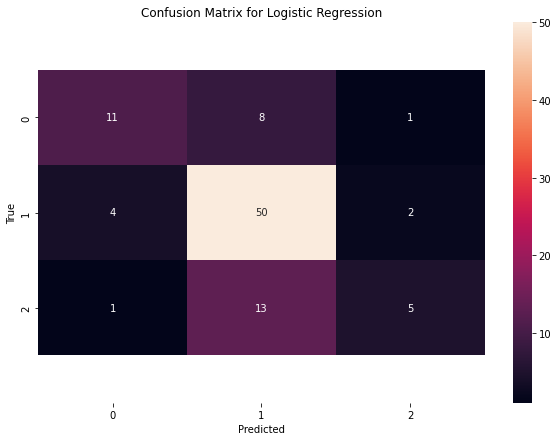

In [138]:
# logistic Regression
df_cm = pd.DataFrame(cm_logistic, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_logistic_150', dpi = 150)
plt.savefig('confusion_matrix_logistic_600', dpi = 600)
plt.show()

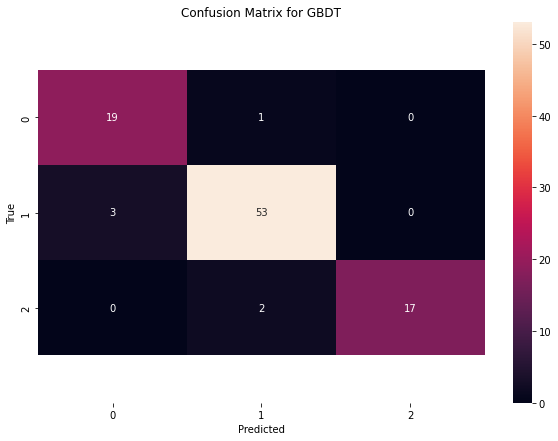

In [139]:
# GBDT
df_cm = pd.DataFrame(cm_GBDT, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for GBDT')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_GBDT_150', dpi = 150)
plt.savefig('confusion_matrix_GBDT_600', dpi = 600)
plt.show()

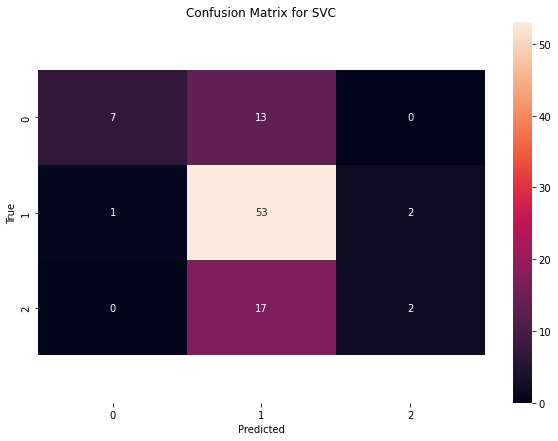

In [140]:
# SVC
df_cm = pd.DataFrame(cm_SVC, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for SVC')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_SVC_150', dpi = 150)
plt.savefig('confusion_matrix_SVC_600', dpi = 600)
plt.show()

## Feature Importance

In [141]:
importances = model_tree.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_tree.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [142]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.560946,0.116145
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.081945,0.046760
Pleural Effusion：0 NO；1YES,0.044424,0.036235
Rhonchus or Wheeze：0 NO；1Left；2 right；3 two sides,0.043125,0.023302
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.041961,0.022817


In [143]:
importances = model_GBDT.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_GBDT.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [144]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.590945,0.097461
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.095563,0.053413
Pleural Effusion：0 NO；1YES,0.049674,0.036756
Rhonchus or Wheeze：0 NO；1Left；2 right；3 two sides,0.045501,0.025023
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.038809,0.027948


# Hasil Percobaan

## Import Package

In [145]:
from sklearn.model_selection import GridSearchCV

In [158]:
parameters = [{
'penalty': ['l1', 'l2'], 
'C': [1,10],
'random_state': [0,1,10,100],
'max_iter': [1000,2000,4000]}]

In [169]:
from sklearn.svm import SVC
clf = GridSearchCV(LinearSVC(), parameters, scoring='accuracy')
clf.fit(X_train, Y_train)

GridSearchCV(estimator=LinearSVC(),
             param_grid=[{'C': [1, 10], 'max_iter': [1000, 2000, 4000],
                          'penalty': ['l1', 'l2'],
                          'random_state': [0, 1, 10, 100]}],
             scoring='accuracy')

In [160]:
clf.best_params_

{'C': 1, 'max_iter': 4000, 'penalty': 'l2', 'random_state': 0}

In [164]:
model_baru = OneVsRestClassifier(LinearSVC(C=1, max_iter=4000, penalty='l2', random_state=0))
model_baru.fit(X_train,Y_train)
y_predict_baru = model_baru.predict(X_test)

In [165]:
np.mean(y_predict_baru == Y_test)

0.8105263157894737

In [166]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_baru, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 57.89% (16.64%)
